## Gerando os metadados

In [1]:
import numpy as np
import os
import pandas as pd
import glob
from scipy.io import wavfile as wav
import struct
import wave
import matplotlib.pyplot as plt

path = os.getcwd()
path+='/extendedballroom_v1.1'

print(path)
# /home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1


In [2]:
 # dataset_path = 'E:\DATASET\Ballroom'
# dataset_path ='E:\TEIA_DATASET\BallroomEextended_WAV'

dataset_path=path

In [3]:
ballroom_metadata = []

In [4]:
def extract_features(path_audio):
    features = []
    
    rate, wav_sample = wav.read(path_audio)
    audio = open(path_audio, "rb")
    buffer_header = audio.read(44)
    bit_depth = struct.unpack('<H', buffer_header[34:36])[0]
    n_channel = struct.unpack('<H', buffer_header[22:24])[0]
    
    duration = wav_sample.shape[0]/rate
    
    features = (rate, duration, n_channel, bit_depth)
    
    return features

In [5]:
def metadata_generator(dataset_path):
    path_folders = glob.glob(dataset_path + '/' + '*')
    
    print(path_folders)
    
    for fold_ in path_folders:
        path_classes = glob.glob(fold_ + '/' + '*')
        
        print(path_classes)
        
        #capturando o nome do set e a qual o audio pertence: treino ou teste
        Base = fold_.split('/')[-1]
    
        class_id = 0
        audio_class = []
        
        for class_ in path_classes: 
            
            class_id += 1
            
            #capturando o nome das classes
            label = class_.split('/')[-1]

            path_audios = glob.glob(class_ + '/' + '*')

            for audio_ in path_audios: 
                print(audio_)
                
                
                #capturando o nome das classes
                audio_name = audio_.split('/')[-1]

#               ft = extract_features(audio_)
                opened_audio = wave.open(audio_, "rb").getparams()
    
    
                rate = opened_audio[2]
                duration = opened_audio[3]/opened_audio[2]
                n_channels = opened_audio[0]
                bit_depth = opened_audio[1]**4 #(verificar)

                audio_class = [audio_name, class_id, label, Base, duration, rate, n_channels, bit_depth]

                ballroom_metadata.append(audio_class)
    
    return ballroom_metadata

In [6]:
metadata = metadata_generator(dataset_path)

['/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste', '/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino']
['/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Salsa', '/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Samba', '/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Wcswing', '/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba', '/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Quickstep', '/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Slowwaltz', '/home/wellington/Docum

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Samba/117802.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Samba/116301.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Samba/117403.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Samba/109811.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Samba/115612.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Samba/113611.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Samba/111203.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/exten

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/101210.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/110725.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/118515.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/115927.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/110817.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/117427.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/112317.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/exten

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/111532.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/116128.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/118221.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/105409.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/112428.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/113623.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Rumba/113215.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/exten

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Quickstep/117734.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Quickstep/117303.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Quickstep/117936.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Quickstep/109314.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Quickstep/114731.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Quickstep/114730.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/teste/Quickstep/107346.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Foxtrot/105012.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Foxtrot/113021.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Foxtrot/118328.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Foxtrot/114918.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Foxtrot/106512.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Foxtrot/114429.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Foxtrot/108110.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Process

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/113622.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/116120.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/116710.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/105407.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/118815.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/106101.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/114512.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/118007.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/116308.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/112505.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/105417.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/110713.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/115605.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Chacha/111214.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Viennesewaltz/113017.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Viennesewaltz/100610.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Viennesewaltz/102612.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Viennesewaltz/114913.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Viennesewaltz/109909.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Viennesewaltz/105708.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Viennesewaltz/116011.wav
/home/wellington/Documentos

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Waltz/112822.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Waltz/107928.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Waltz/110126.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Waltz/107803.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Waltz/112001.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Waltz/114711.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Waltz/104803.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audi

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Jive/116132.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Jive/113942.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Jive/104017.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Jive/110736.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Jive/111722.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Jive/116716.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Jive/111542.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/exten

/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Tango/114715.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Tango/107938.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Tango/114419.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Tango/116513.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Tango/104506.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Tango/113513.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/treino/Tango/107317.wav
/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audi

In [7]:
#Salvando os netadados em um .csv
os.chdir(dataset_path)
header = "AudioName,ClassID,Class,Base,Duration,FrameRate,Channels,Bits/A"
np.savetxt("ballroomExtended_metadata.csv", metadata, delimiter=",", fmt="%s", header=header)

In [15]:
#mostrar arquivo
metadata_path = pd.read_csv("/home/wellington/Documentos/UFPI/periodos/9/Topicos_IA/2020.1/Processamento_de_audio/extendedballroom_v1.1/ballroomExtended_metadata.csv",index_col = 0)
metadata_path
  

,ClassID,Class,Base,Duration,FrameRate,Channels,Bits/A
# AudioName,,,,,,,
116608.wav,1,Salsa,teste,30.000000,48000,2,16
118601.wav,1,Salsa,teste,29.988571,44100,2,16
118607.wav,1,Salsa,teste,29.988571,44100,2,16
118604.wav,1,Salsa,teste,29.988571,44100,2,16
118613.wav,1,Salsa,teste,29.988571,44100,2,16
118609.wav,1,Salsa,teste,29.988571,44100,2,16
118618.wav,1,Salsa,teste,29.988571,44100,2,16
116613.wav,1,Salsa,teste,30.000000,48000,2,16
118610.wav,1,Salsa,teste,29.988571,44100,2,16


## Numero de musicas por Classes

In [9]:
classes= metadata_path["Class"].value_counts().to_frame()
print(classes)

               Class
Waltz            529
Foxtrot          507
Quickstep        497
Rumba            470
Samba            468
Tango            464
Chacha           455
Jive             350
Viennesewaltz    252
Slowwaltz         65
Pasodoble         53
Salsa             47
Wcswing           23


## Gráfico do Tamanho dos aúdios

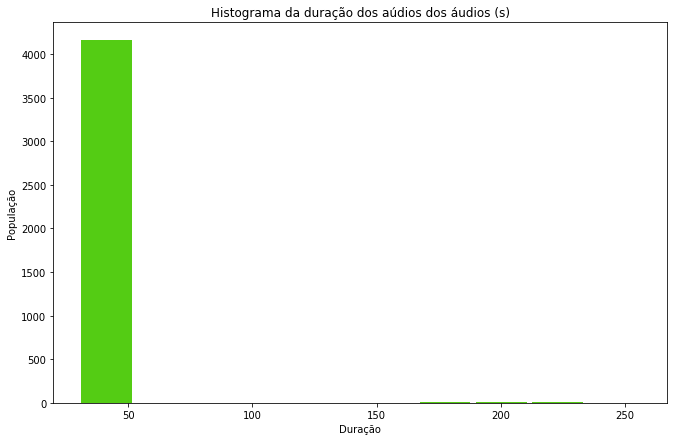

In [11]:
plt.hist(metadata_path['Duration'], rwidth=0.9, color='#54CC14')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Duração')
plt.ylabel('População')
plt.title('Histograma da duração dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()

## Gráfico da Frequência dos aúdios

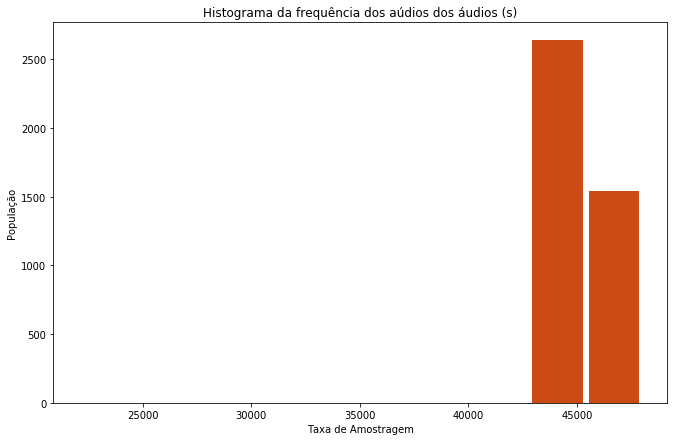

In [12]:
plt.hist(metadata_path['FrameRate'], rwidth=0.9, color='#CC4A14')
plt.rcParams['figure.figsize'] = (11,7)
plt.xlabel('Taxa de Amostragem')
plt.ylabel('População')
plt.title('Histograma da frequência dos aúdios dos áudios (s)')
plt.grid(False)
plt.show()